In [1]:
import pandas as pd

In [2]:
train_1 = pd.read_csv("../dataset/unprocessed/jigsaw-toxic-comment-classification-challenge/train.csv")
train_2 = pd.read_csv("../dataset/unprocessed/jigsaw-unintended-bias-in-toxicity-classification/train.csv")

In [3]:
test_1 = pd.read_csv("../dataset/unprocessed/jigsaw-toxic-comment-classification-challenge/test.csv")
test_2 = pd.read_csv("../dataset/unprocessed/jigsaw-unintended-bias-in-toxicity-classification/test.csv")

In [4]:
train_1.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [5]:
train_1.loc[train_1["id"] == "0002bcb3da6cb337"]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0


In [6]:
train_2[["id", "comment_text", "target"]].head(10)

,id,comment_text,target
0,59848,"This is so cool. It's like, 'would you want yo...",0.000000
1,59849,Thank you!! This would make my life a lot less...,0.000000
2,59852,This is such an urgent design problem; kudos t...,0.000000
3,59855,Is this something I'll be able to install on m...,0.000000
4,59856,haha you guys are a bunch of losers.,0.893617
5,59859,ur a sh*tty comment.,0.666667
6,59861,hahahahahahahahhha suck it.,0.457627
7,59863,FFFFUUUUUUUUUUUUUUU,0.000000
8,239575,The ranchers seem motivated by mostly by greed...,0.000000
9,239576,It was a great show. Not a combo I'd of expect...,0.000000


In [7]:
test_1.shape

(153164, 2)

In [8]:
test_2.shape

(97320, 2)

### Add score feature and remove unnecessary columns from train_1

In [9]:
def label_toxicity_score(row):
    weights = {"toxic": 0.4, "severe_toxic": 0.2, "obscene": 0.4, "threat": 0.4, "insult": 0.2, "identity_hate": 0.3 }
    score = sum(row[key] * weight for key, weight in weights.items())

    if score > 1:
        score = 1
        
    return score

In [10]:
train_1["score"] = train_1.apply(label_toxicity_score, axis=1)

In [11]:
train_1 = train_1.loc[:, ["id", "comment_text", "score"]]
train_1.head()

,id,comment_text,score
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0


### Add score feature and remove unnecessary columns from train_2

In [12]:
train_2["score"] = train_2["target"]

In [13]:
train_2 = train_2.loc[:, ["id", "comment_text", "score"]]
train_2.head()

,id,comment_text,score
0,59848,"This is so cool. It's like, 'would you want yo...",0.000000
1,59849,Thank you!! This would make my life a lot less...,0.000000
2,59852,This is such an urgent design problem; kudos t...,0.000000
3,59855,Is this something I'll be able to install on m...,0.000000
4,59856,haha you guys are a bunch of losers.,0.893617


### Add train_2 to train_1, test_2 to test_1, and ignore duplicate data

In [14]:
def merge(ds1, ds2):
    # Create a set of all unique comment_texts in ds2
    ds2_comments_set = set(ds2["comment_text"].str.strip())

    # Create a boolean mask for rows in ds2 that should be added to ds1
    mask = ~ds2["comment_text"].str.strip().isin(ds1["comment_text"].str.strip())

    # Filter rows from ds2 that are not in ds1
    rows_to_add = ds2[mask]

    # Concatenate the rows_to_add to ds1
    ds1 = pd.concat([rows_to_add, ds1], ignore_index=True)

    return ds1

In [15]:
train = merge(train_1, train_2)
train.shape

(1964294, 3)

In [16]:
test = merge(test_1, test_2)
test.shape

(250441, 2)

In [17]:
train[["score"]].head(20)

,score
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.893617
5,0.666667
6,0.457627
7,0.000000
8,0.000000
9,0.000000


In [18]:
train["target"] = train["score"].apply(lambda x: 1 if x >= 0.4 else 0)

In [19]:
toxic = train.loc[train["target"] == 1]
not_toxic = train.loc[train["target"] == 0]

In [20]:
toxic.shape

(217342, 4)

In [21]:
not_toxic.shape

(1746952, 4)

### Make sure comment_text is lowercase

In [22]:
train.loc[:, "comment_text"] = train["comment_text"].str.lower()
test.loc[:, "comment_text"] = test["comment_text"].str.lower()

### Drop any row that comment_text is empty

In [23]:
train = train.dropna(subset="comment_text", how='any',axis=0)

### Replacing contractions

In [24]:
import contractions

In [25]:
train.loc[:, "comment_text"] = train["comment_text"].apply(lambda x: contractions.fix(str(x)))
test.loc[:, "comment_text"] = test["comment_text"].apply(lambda x: contractions.fix(str(x)))

In [26]:
train.head()

,id,comment_text,score,target
0,59848,"this is so cool. it is like, 'would you want y...",0.000000,0
1,59849,thank you!! this would make my life a lot less...,0.000000,0
2,59852,this is such an urgent design problem; kudos t...,0.000000,0
3,59855,is this something i will be able to install on...,0.000000,0
4,59856,haha you guys are a bunch of losers.,0.893617,1


### Removing URLs

In [27]:
import re

In [28]:
def remove_URL(text):
    """
        Remove URLs from a sample string
    """
    return re.sub(r"https?://\S+|www\.\S+", "", text)

In [29]:
train.loc[:, "comment_text"] = train["comment_text"].apply(lambda x: remove_URL(x))
test.loc[:, "comment_text"] = test["comment_text"].apply(lambda x: remove_URL(x))

### Removing HTML Tags

In [30]:
def remove_html(text):
    """
        Remove the html in sample text
    """
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

In [31]:
train.loc[:, "comment_text"] = train["comment_text"].apply(lambda x: remove_html(x))
test.loc[:, "comment_text"] = test["comment_text"].apply(lambda x: remove_html(x))

### Remove non-ascii characters (since we are only concerned with English, and basic 

In [32]:
def remove_non_ascii(text):
    """
        Remove non-ASCII characters
    """
    return re.sub(r'[^\x00-\x7f]',r'', text)

In [33]:
train.loc[:, "comment_text"] = train["comment_text"].apply(lambda x: remove_non_ascii(x))
test.loc[:, "comment_text"] = test["comment_text"].apply(lambda x: remove_non_ascii(x))

## We put test data through the cleaning process, because when we use the model, we will also clean the data first before putting it through the model.

In [34]:
import matplotlib.pyplot as plt
import numpy as np

(array([0.88935346, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.11064654]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

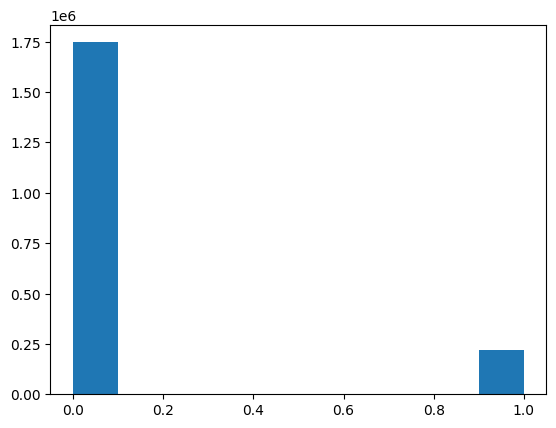

In [35]:
target = train["target"]
plt.hist(target)
weights = np.ones_like(target)/len(target)
plt.hist(target, weights=weights)

In [36]:
train = pd.concat([toxic, not_toxic.sample(220_000, random_state=53)])

(array([0.50303881, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.49696119]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

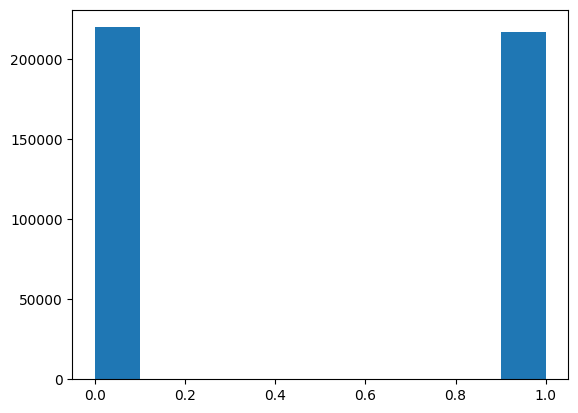

In [37]:
target = train["target"]
plt.hist(target)
weights = np.ones_like(target)/len(target)
plt.hist(target, weights=weights)

In [38]:
# x_train_combined("../dataset/processed/tmp_text.csv")
# y_train_combined("../dataset/processed/tmp_target.csv")
train.to_csv("../dataset/processed/train.csv")
test.to_csv("../dataset/processed/test.csv")